In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv("BIKE DETAILS.csv")

In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,88060.794212
1,Honda Dio,45000,2017,Individual,1st owner,5650,88060.794212
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,88060.794212


In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,433


In [ ]:
df['ex_showroom_price'].fillna(df['ex_showroom_price'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


In [ ]:
df['selling_price'].unique()

array([175000,  45000, 150000,  65000,  20000,  18000,  78500, 180000,
        30000,  50000,  35000,  28000,  80000, 365000, 185000,  25000,
        40000, 120000,  15000,  26000,  32000, 110000,  42000,  21000,
        55000,  38000,  43000,  62000,  60000,  90000, 125000,  85000,
        29900,  70000,  48000,  34000, 165000,  29500,  95000,   7500,
       160000, 140000,  22000,  22989,  24999,  75000,  17500,  57000,
        83900, 135000, 299000, 750000, 190000, 130000,  54786,  72000,
       100000, 138000, 170000, 123000,  23000,  41000,  47999,  36999,
        12000,  27000,  10000,  56000,  58000,  87000, 145000,   9000,
        14000,  17000, 210000,  54000, 260000,  98000, 200000, 195000,
       270000, 425000, 760000,  37000, 330000, 162000, 285000,  69000,
       300000,  26500,  78000,   8000,  39000,  36000,  16000,  83299,
        14700,  19000,  14900,  24000,  24700,  52000,  47000, 105000,
       115000,   5000,  86000,  28700,   6000,  23500,  68000,  20100,
      

***1.what is the range of selling price in the data set?***

In [ ]:
#find the maximum value:
max_price = df['selling_price'].max()
#find the minimum value:
min_price = df['selling_price'].min()

#calculate the range of selling_price:
price_range = max_price - min_price
print(f"The range of selling price is: {price_range}")

The range of selling price is: 755000


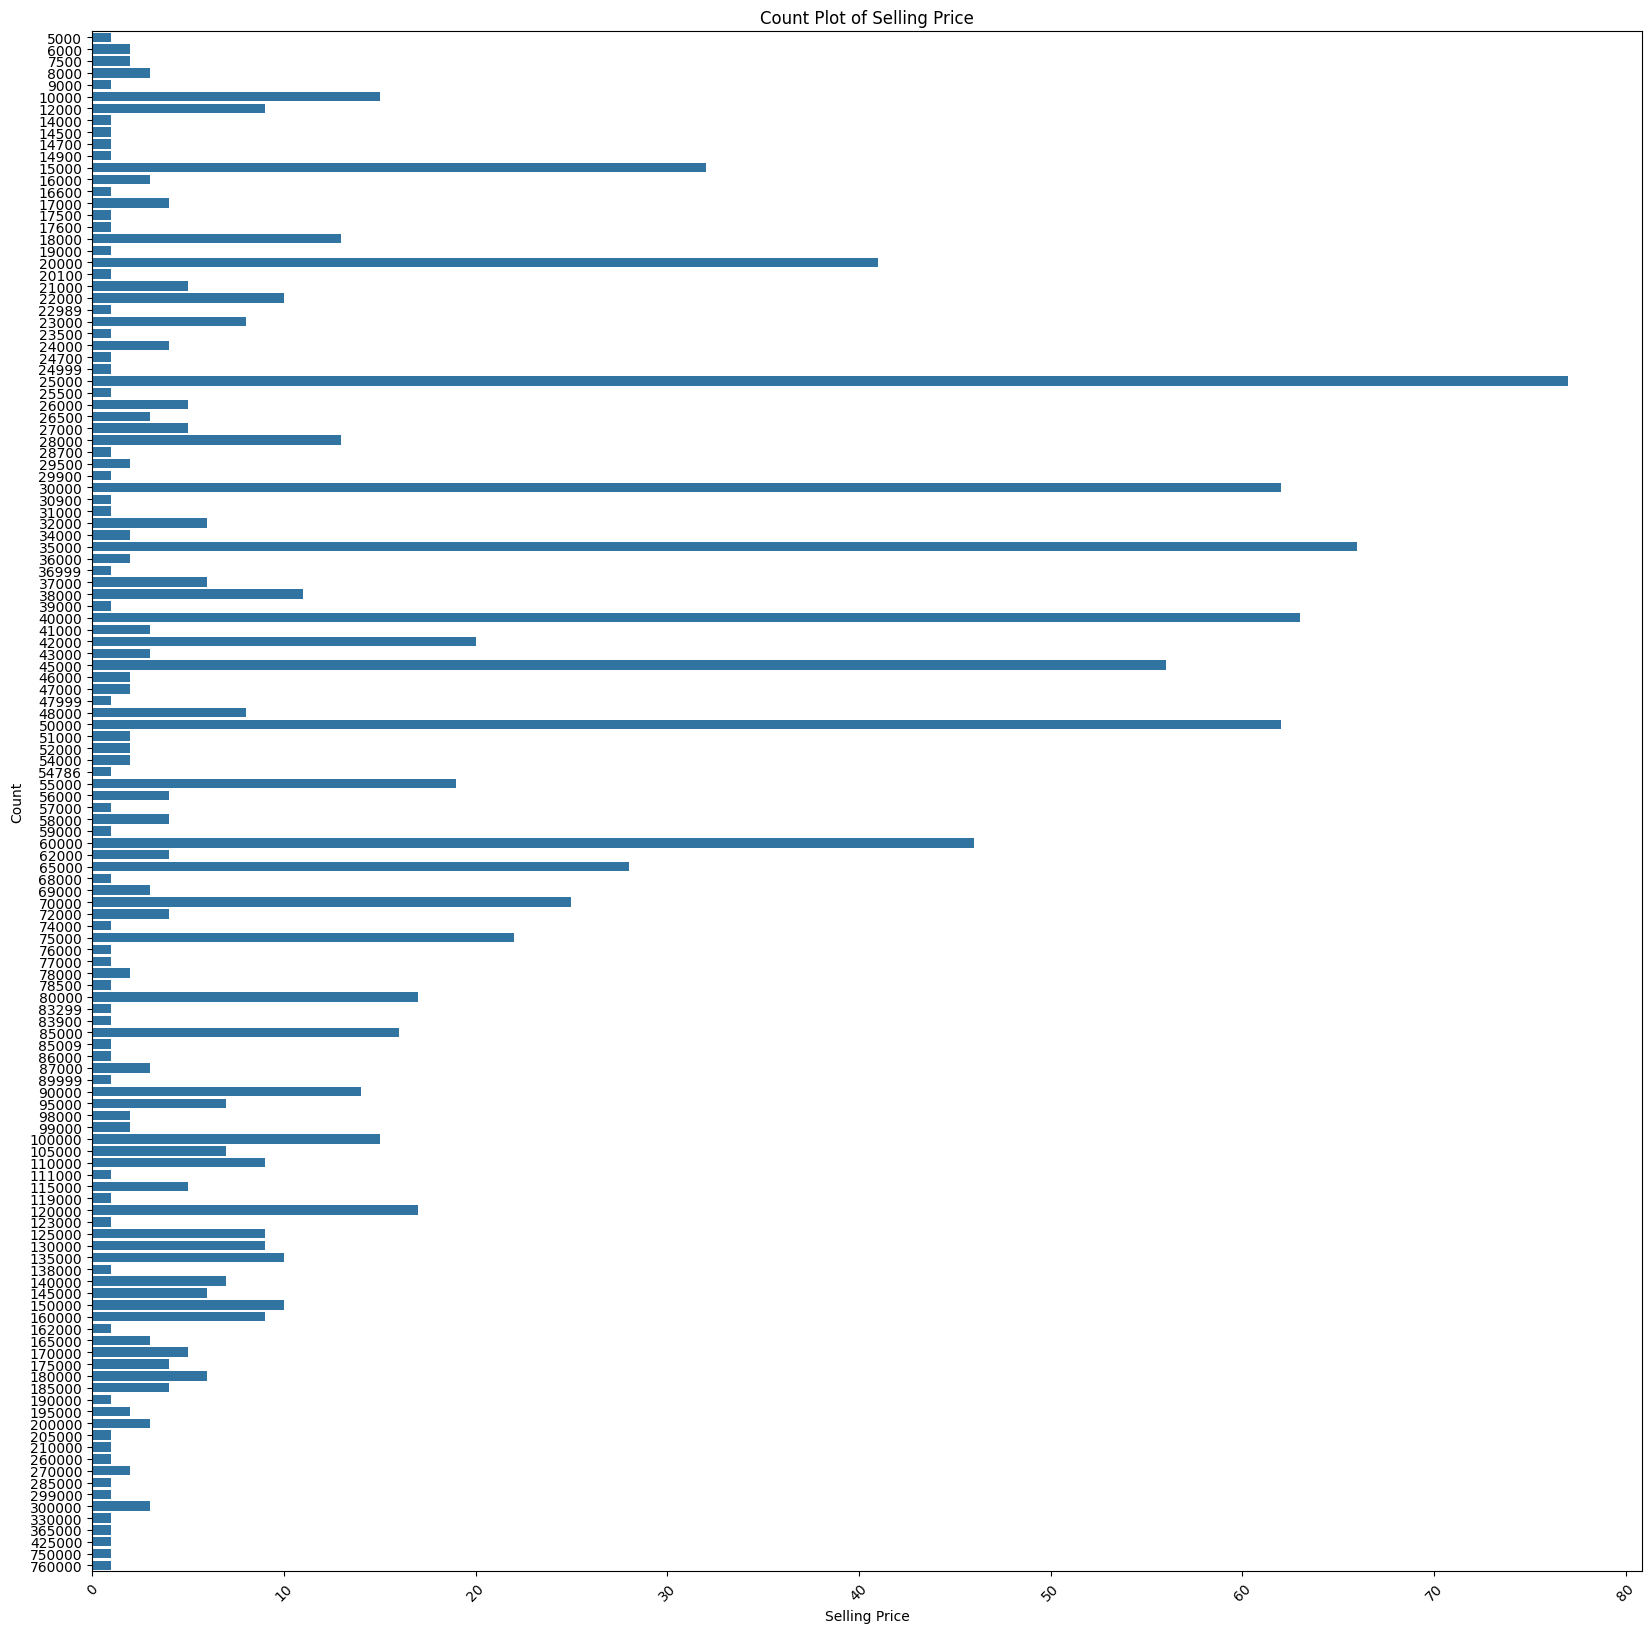

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(y='selling_price', data=df)
plt.title('Count Plot of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

***2.what is the median selling price for bikes in the dataset?***

In [ ]:
median_selling_price=df['selling_price'].median()
print(f"The median selling price for bikes in the dataset is: {median_selling_price}")

The median selling price for bikes in the dataset is: 45000.0


***3.what is the most common seller type?***

In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1049
Dealer,6


In [ ]:
most_common_seller_type = df['seller_type'].value_counts().index[0]
print(f"The most common seller type is: {most_common_seller_type}")

The most common seller type is: Individual


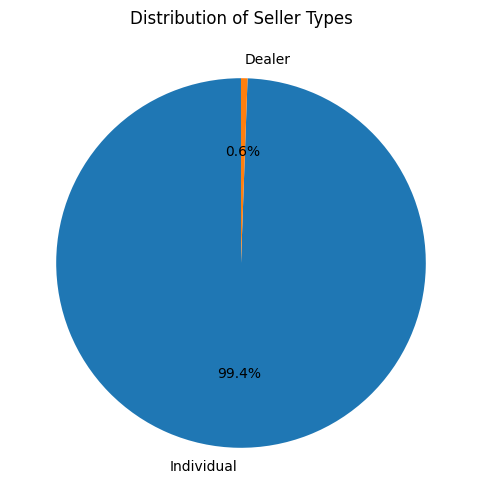

In [ ]:
plt.figure(figsize=(12, 6))
plt.pie(x=df['seller_type'].value_counts(), labels=df['seller_type'].value_counts().index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Seller Types')
plt.show()

***4.How many bikes have driven more than 50000 kilometers?***

In [ ]:
number_of_bikes_filtered = df[df['km_driven'] > 50000]
lenth_of_filtered_bikes_driven = len(number_of_bikes_filtered)
print(f"The number of bikes that have driven more than 50000 kilometers is: {lenth_of_filtered_bikes_driven}")

The number of bikes that have driven more than 50000 kilometers is: 170


***5.What is the avarage km_driven value for each ownership type?***

In [ ]:
df["owner"].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
average_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()
print(average_km_driven_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


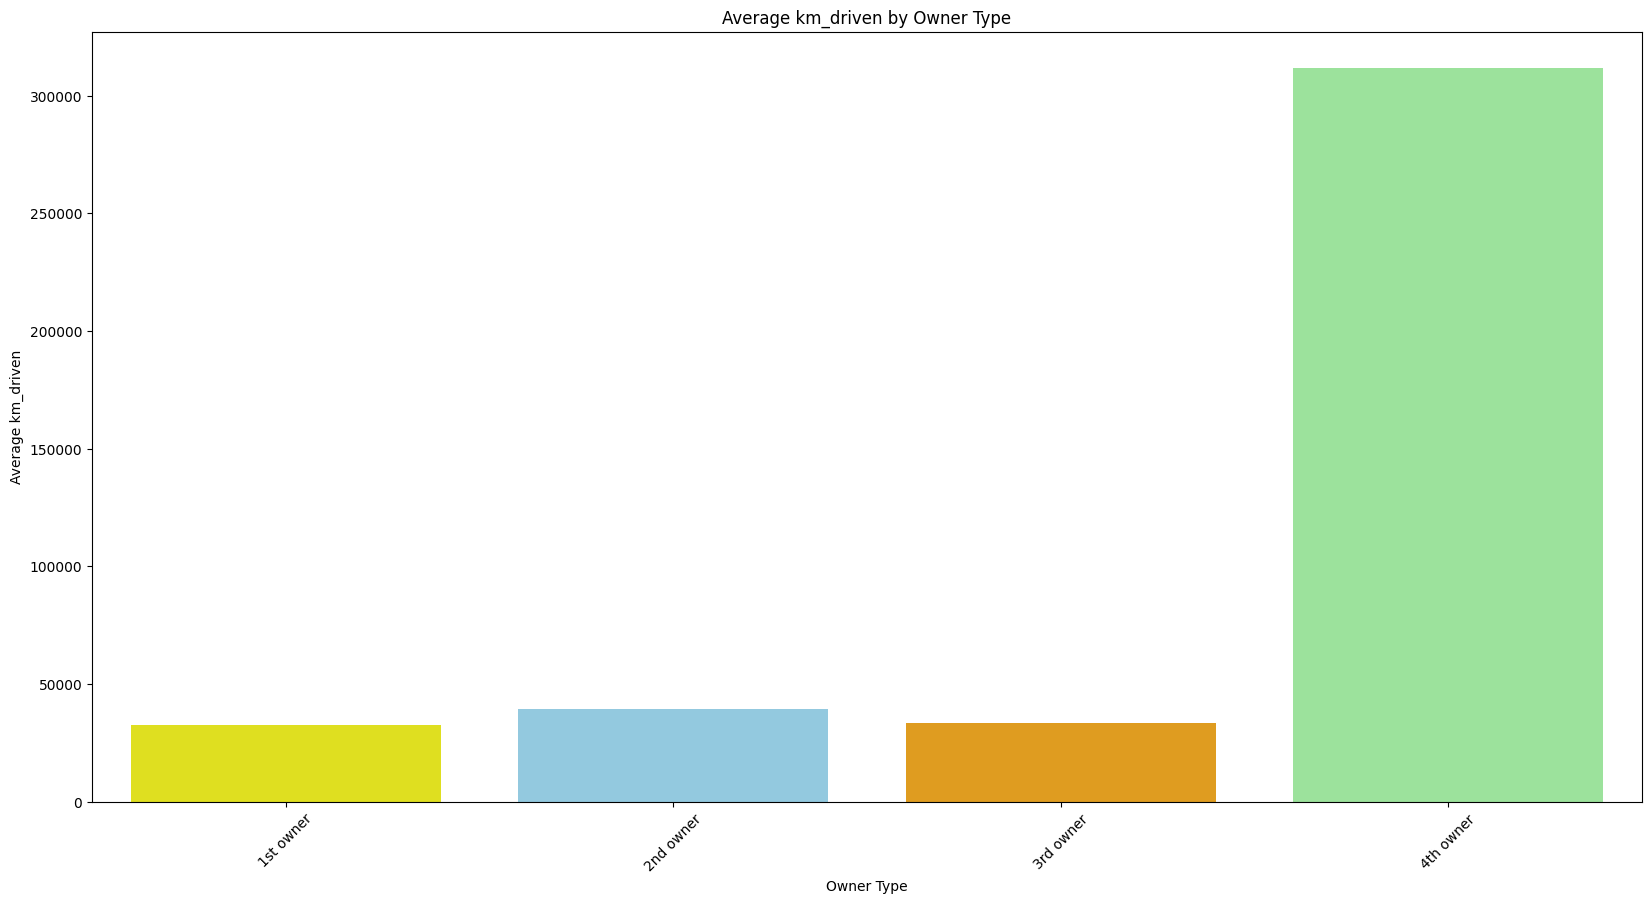

In [ ]:
plt.figure(figsize=(20, 10))
colours=['yellow','skyblue','orange','lightgreen']
sns.barplot(x=average_km_driven_by_owner.index, y=average_km_driven_by_owner.values,palette=colours)
plt.title('Average km_driven by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Average km_driven')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


***6.what are the proportion of bikes are from the year of 2015 or older?***

In [ ]:
df['year'].unique()

array([2019, 2017, 2018, 2015, 2011, 2010, 2008, 2016, 2020, 2012, 2006,
       2013, 2009, 2014, 2004, 2007, 2000, 2002, 2005, 1997, 2001, 1988,
       1999, 1998, 1991, 2003, 1993, 1995])

In [ ]:
older_bikes = df[df['year'] >= 2015]
proportion_older_bikes = len(older_bikes) / len(df)
print(f"The proportion of bikes from the year 2015 or older is: {proportion_older_bikes:.2%}")

The proportion of bikes from the year 2015 or older is: 52.78%


<Figure size 1500x1500 with 0 Axes>

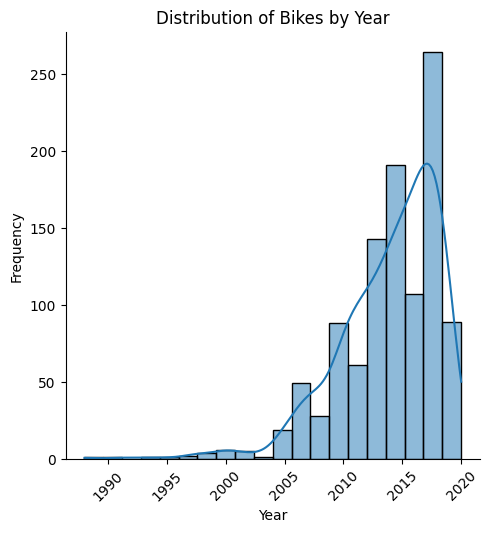

In [ ]:
plt.figure(figsize=(15,15))
sns.displot(df['year'], bins=20, edgecolor='black',kde=True)
plt.title('Distribution of Bikes by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

***The distribution of bikes of year is right skewed data.Outlier are present.***

***7.What is the trend of missing values accross data set?***

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


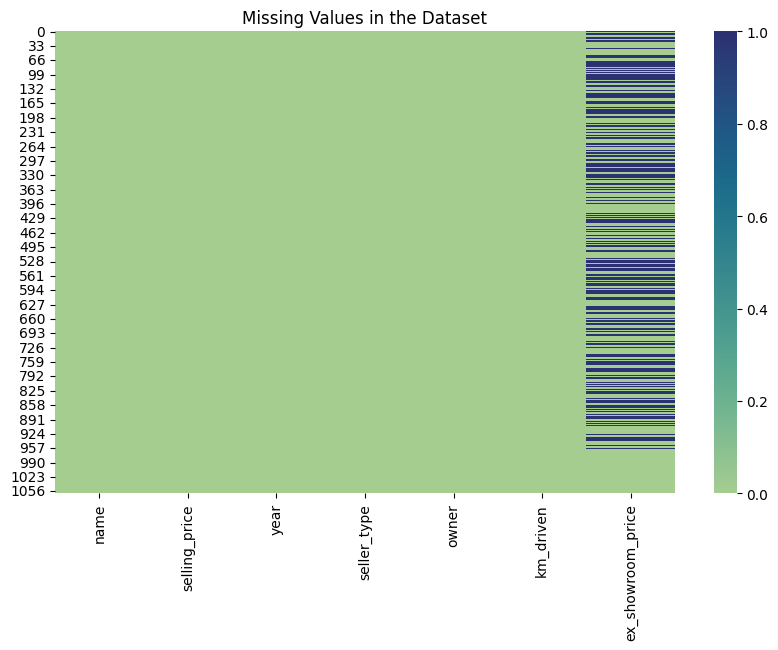

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(),cmap="crest", cbar=True)
plt.title('Missing Values in the Dataset')
plt.show()

***With this visualization We can show the which column is present missing values .This column is ex_showroom_price.We can replace the value median value of ex_showroom_price***

***8.What is the highest ex_showroom_price recorded,and for which bike?***

In [ ]:
Highest_ex_showroom_price =  df[df['ex_showroom_price']==df['ex_showroom_price'].max()]
print(Highest_ex_showroom_price)

                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


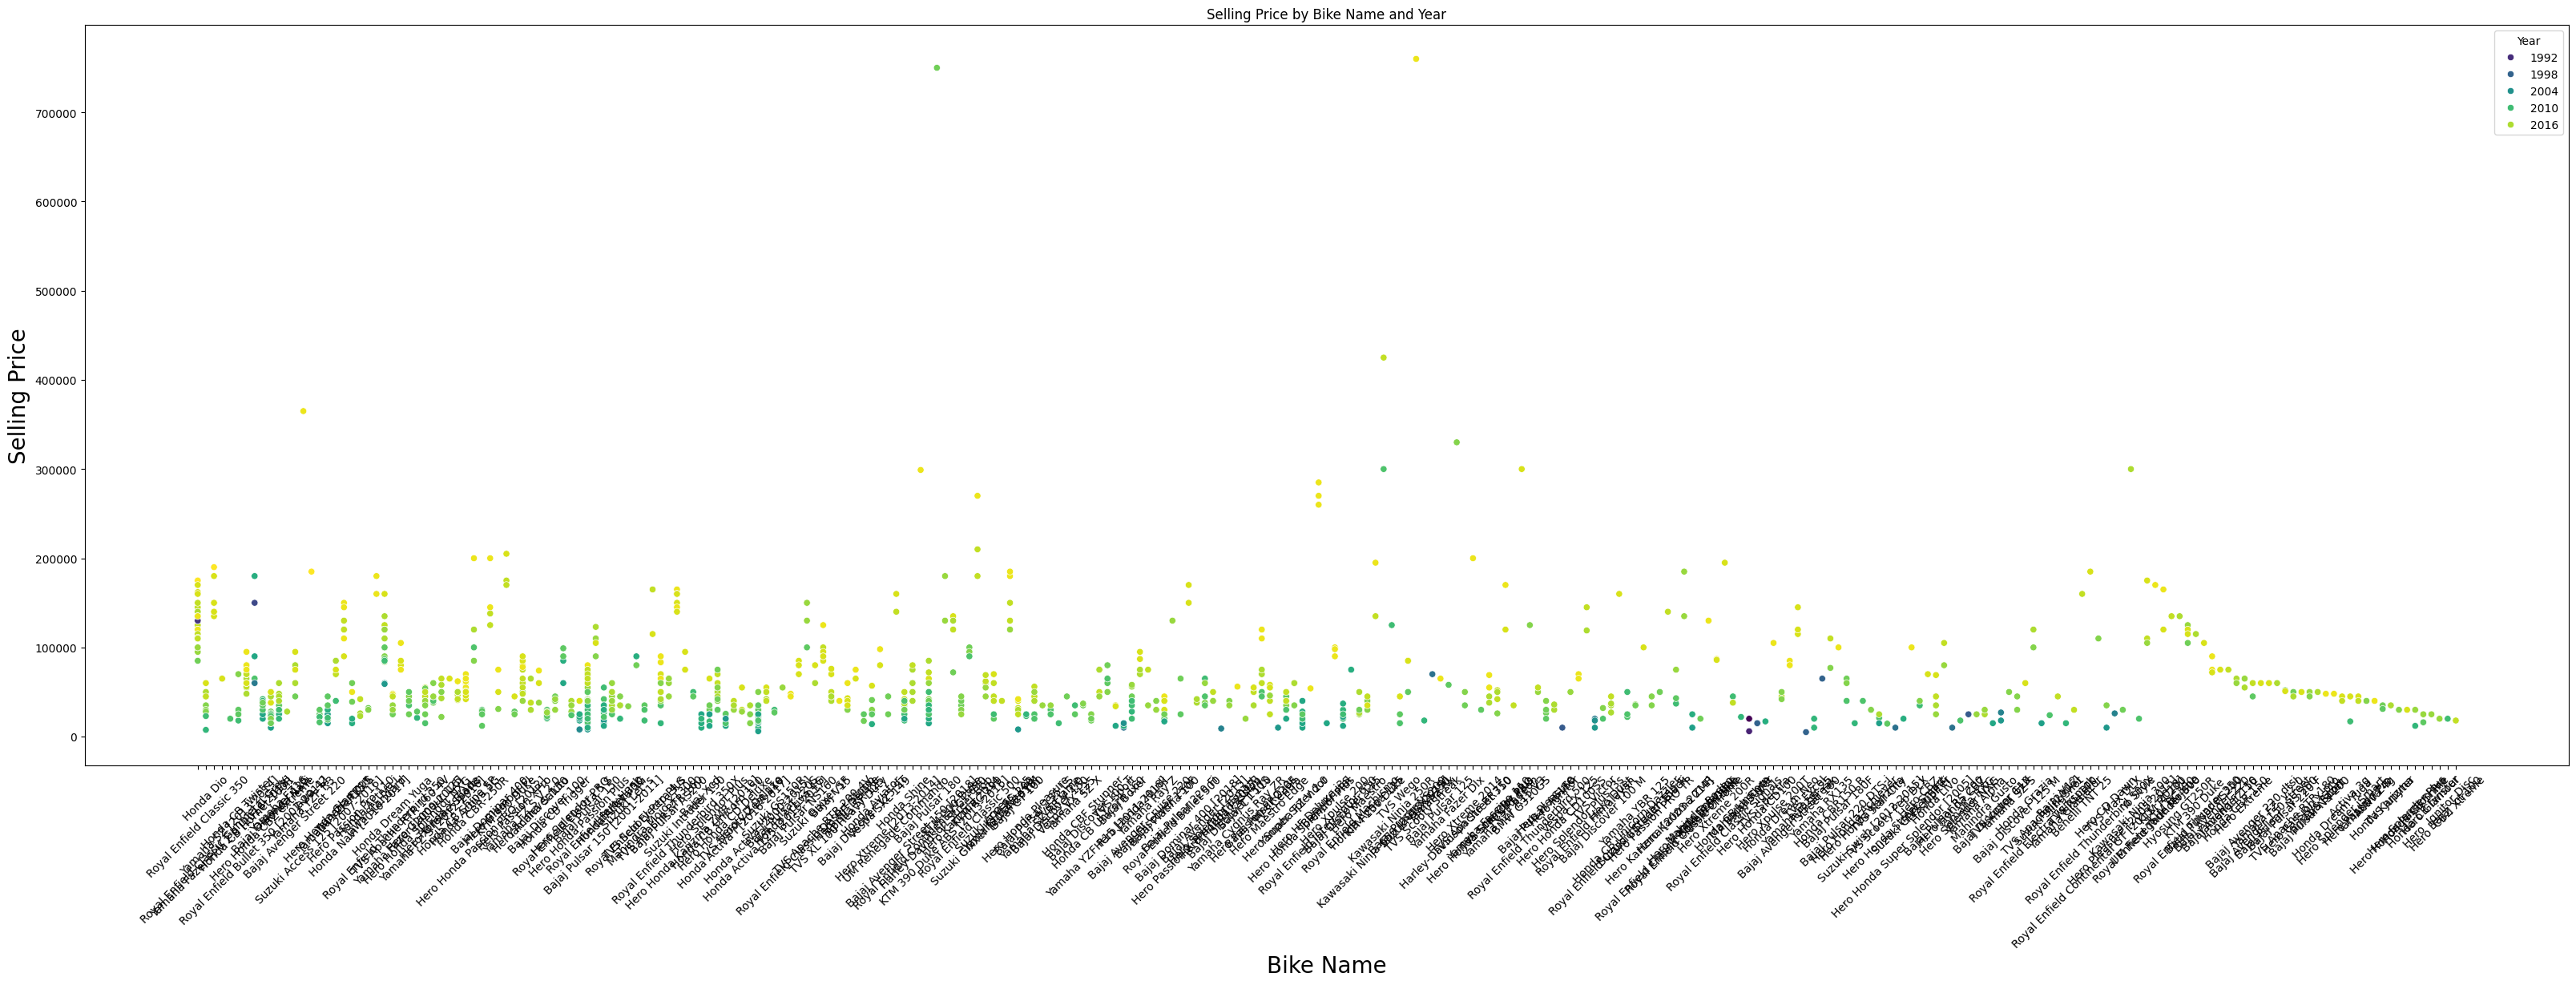

In [ ]:
#visualize the relation of Bike name and selling price
plt.figure(figsize=(40,12))
sns.scatterplot(x='name', y='selling_price', hue='year', data=df,palette='viridis')
plt.title('Selling Price by Bike Name and Year')
plt.xlabel('Bike Name',fontsize=20)
plt.ylabel('Selling Price',fontsize=20)
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

***9.What is the total number of bikes listed by each seller type?***

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
total_bikes_by_seller_type = df['seller_type'].value_counts()
print(total_bikes_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


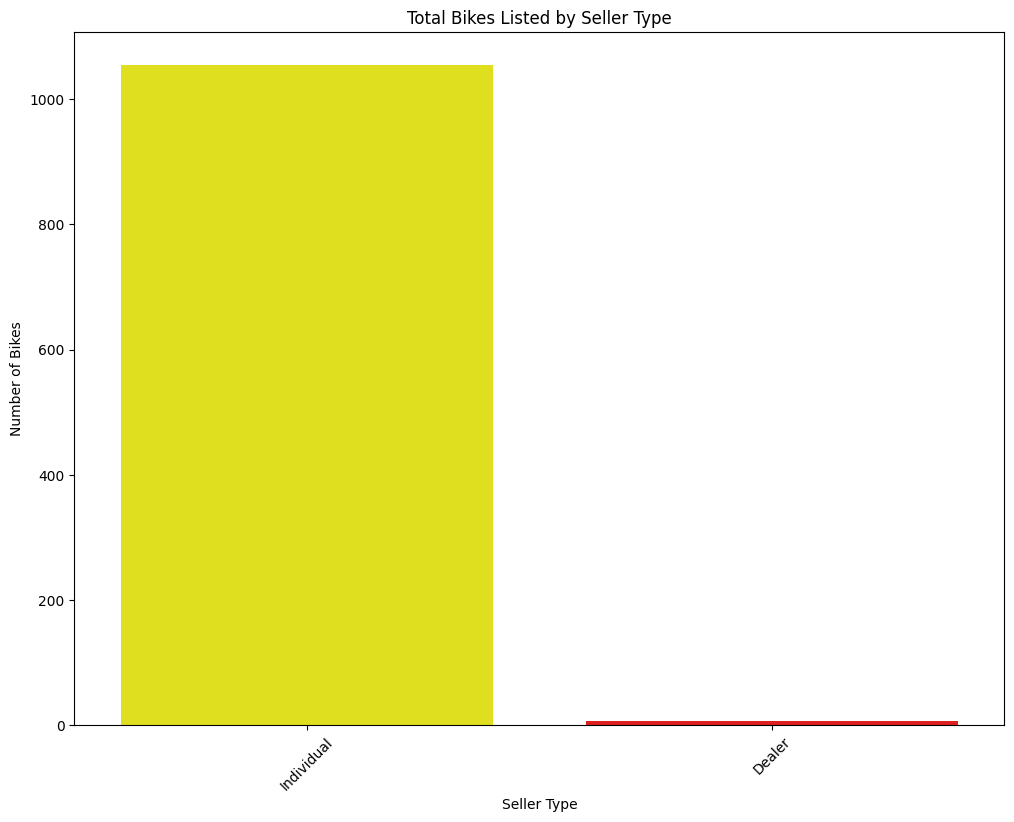

In [ ]:
#Let's visualize this of distribution
plt.figure(figsize=(12, 9))
colours=['yellow','red']
sns.countplot(x='seller_type', data=df,palette=colours)
plt.title('Total Bikes Listed by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Number of Bikes')
plt.xticks(rotation=45)
plt.show()

***10.what is the relationship between selling_price and km_driven for first-owner bikes?***

In [ ]:
first_owner_bikes = df[df['owner'] == '1st owner']
print(first_owner_bikes)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
5                        Honda CB Twister          18000  2010  Individual   
...                                   ...            ...   ...         ...   
1055                        Bajaj  ct 100          18000  2017  Individual   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner

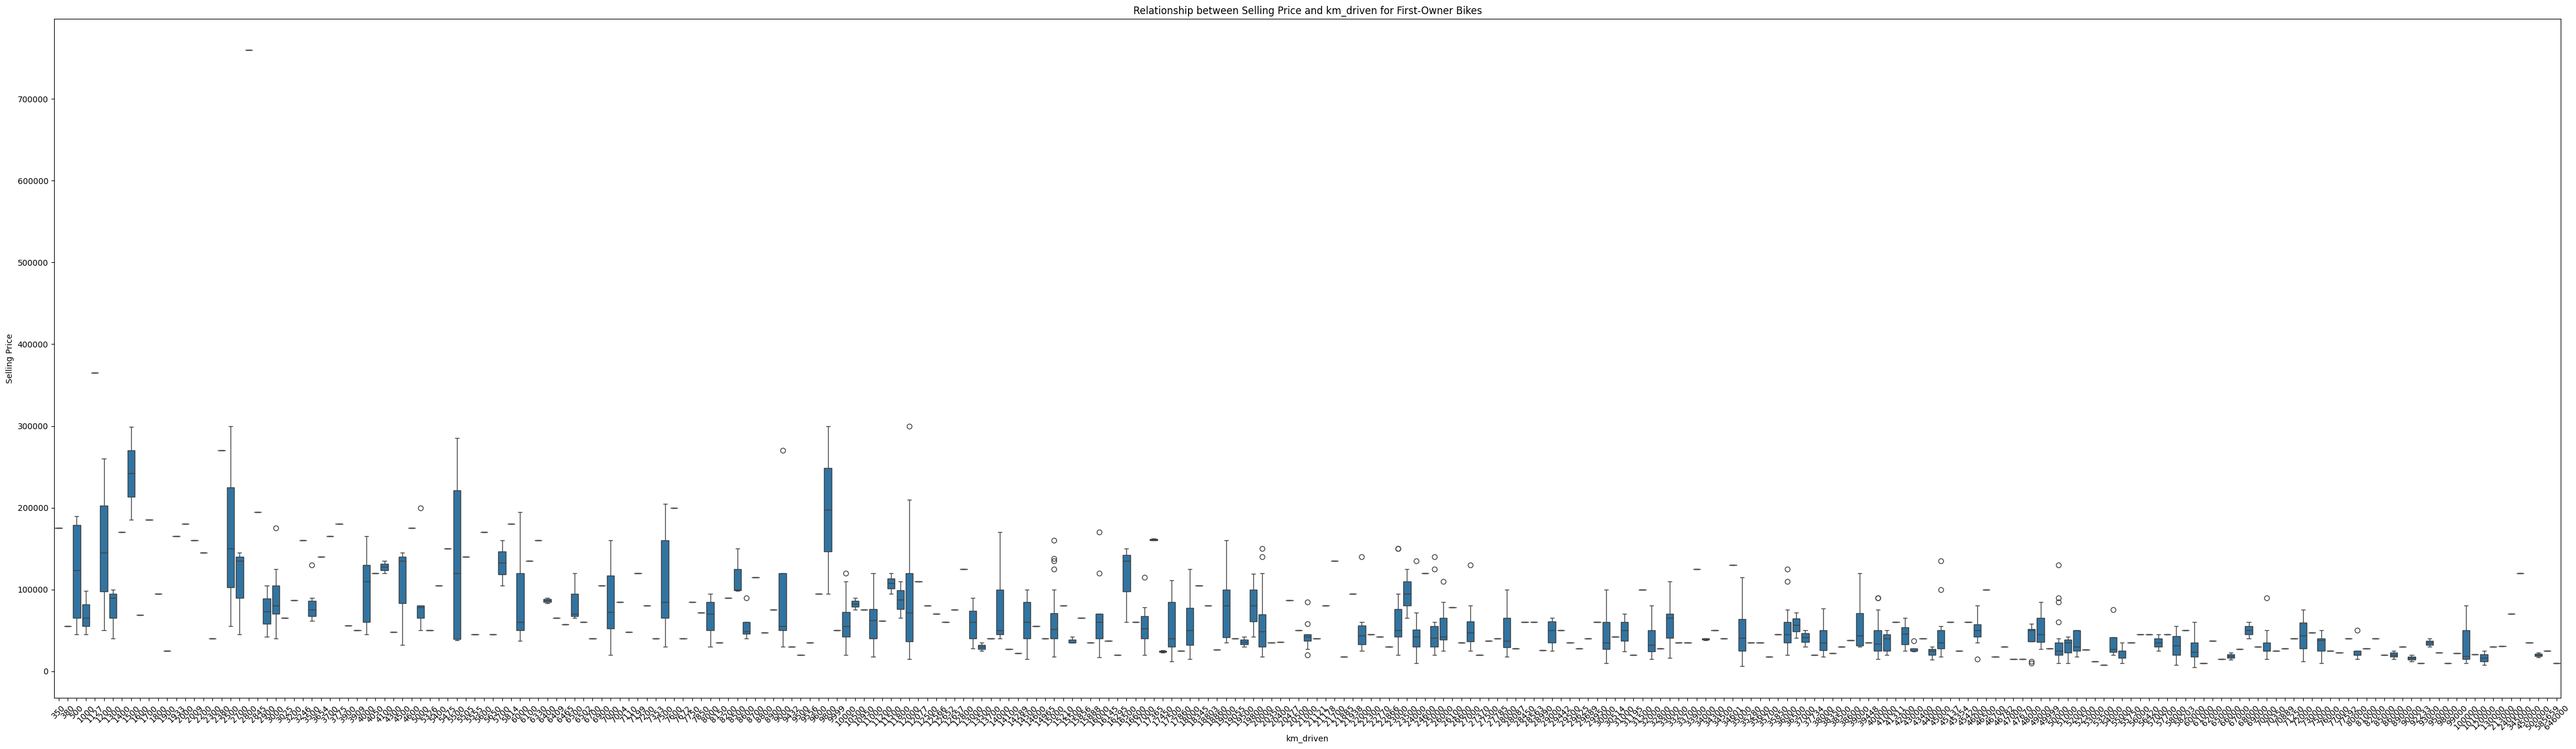

In [ ]:
#Let's visualize the relationship
plt.figure(figsize=(55, 15))
sns.boxplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Relationship between Selling Price and km_driven for First-Owner Bikes')
plt.xlabel('km_driven')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

***11.Identify and remove outliers in the km_driven column using the IQR method.***

In [ ]:
#Calculate the IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print(outliers)

                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  Individual   
548                         Bajaj Xcd 

In [ ]:
remove_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(remove_outliers)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner

***12.Perform a bivariate analysis of to visualize the realationship between year and selling _price?***

Text(0, 0.5, 'Selling Price')

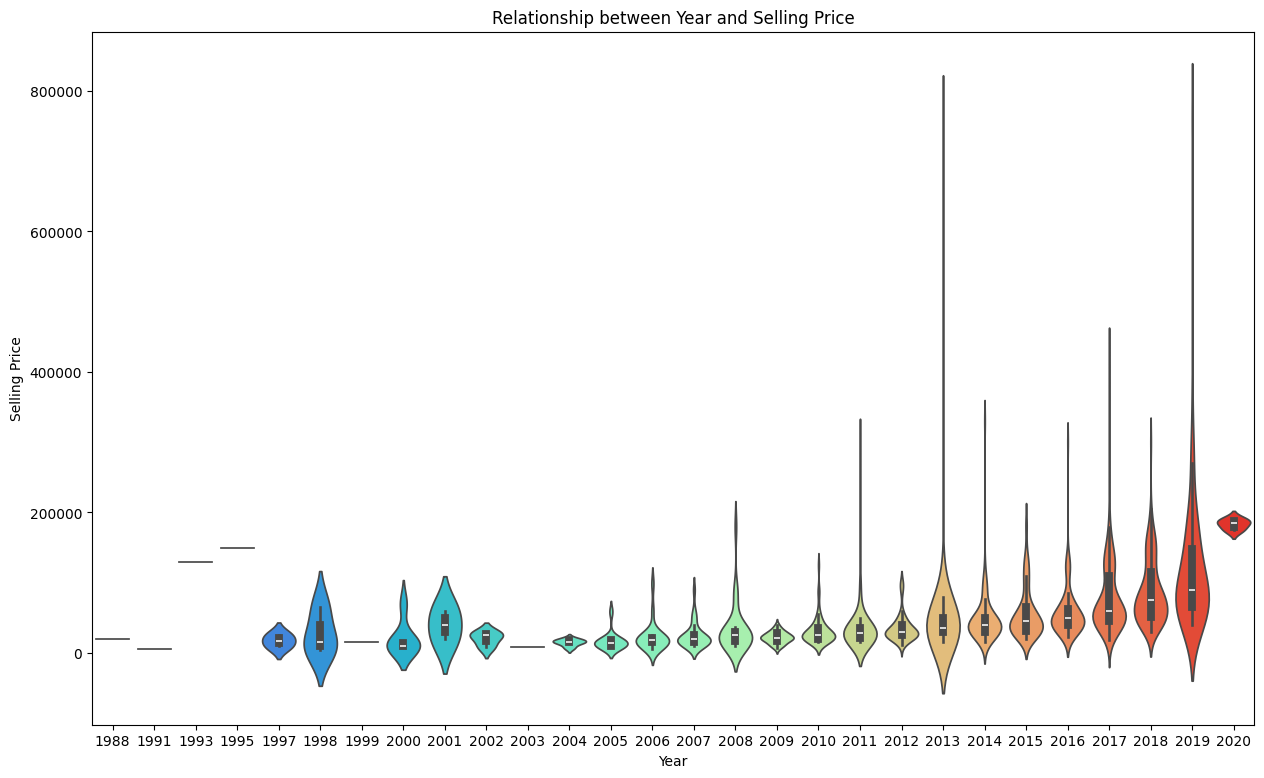

In [ ]:
plt.figure(figsize=(15, 9))
sns.violinplot(x='year', y='selling_price', data=df,palette='rainbow')
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

insight: Most of the data of selling price lie 0-200000

***13.What is the avarage depreciation in selling price based on the bike's age (current year-manufacturing year)?***

In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
# Assume current year is 2025
df['bike_age'] = 2023 - df['year']
average_depreciation_by_age = df.groupby('bike_age')['selling_price'].mean()

print(average_depreciation_by_age)

bike_age
3     183333.333333
4     119689.511628
5      87660.374046
6      78894.736842
7      58469.018692
8      56500.000000
9      48668.131868
10     51136.986301
11     35748.400000
12     35655.721311
13     31793.333333
14     22267.857143
15     34289.285714
16     24927.586207
17     23380.000000
18     16978.571429
19     15100.000000
20      8000.000000
21     20666.666667
22     40000.000000
23     20833.333333
24     15000.000000
25     28333.333333
26     17500.000000
28    150000.000000
30    130000.000000
32      6000.000000
35     20000.000000
Name: selling_price, dtype: float64


***14.Which bike names are priced significantly above the avarage price for their manufacturing year?***

In [ ]:
average_price_by_year = df.groupby('year')['selling_price'].mean()
print(average_price_by_year)

year
1988     20000.000000
1991      6000.000000
1993    130000.000000
1995    150000.000000
1997     17500.000000
1998     28333.333333
1999     15000.000000
2000     20833.333333
2001     40000.000000
2002     20666.666667
2003      8000.000000
2004     15100.000000
2005     16978.571429
2006     23380.000000
2007     24927.586207
2008     34289.285714
2009     22267.857143
2010     31793.333333
2011     35655.721311
2012     35748.400000
2013     51136.986301
2014     48668.131868
2015     56500.000000
2016     58469.018692
2017     78894.736842
2018     87660.374046
2019    119689.511628
2020    183333.333333
Name: selling_price, dtype: float64


In [ ]:
#Merge the average price back into the original DataFrame:
df = df.merge(average_price_by_year, on='year', suffixes=('', '_average'))
print(df)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  bike_age  sellin

In [ ]:
# Calculate the price difference for each bike:
df['price_difference'] = df['selling_price'] - df['selling_price_average']
print(df)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  bike_age  \
0   

In [ ]:
#Identify bikes with a significant price difference:
threshold = df['price_difference'].std()
significantly_above_average = df[df['price_difference'] > threshold]
print(significantly_above_average)


                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
7    Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
13                          Yamaha YZF R3         365000  2019  Individual   
18    Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
..                                    ...            ...   ...         ...   
967             Royal Enfield Thunder 350         125000  2015  Individual   
972                         KTM 390 Duke          115000  2016  Individual   
976             Royal Enfield Classic 350         110000  2015  Individual   
981             Royal Enfield Thunder 350         105000  2013  Individual   
985             Royal Enfield Classic 500          90000  2011  Individual   

         owner  km_driven  ex_showroom_price  bike_age  selling

***15.Develop a correlation matrix for numeric columns and visualize it using heatmap.***

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'bike_age', 'selling_price_average',
       'price_difference'],
      dtype='object')

In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age,selling_price_average,price_difference
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,4,119689.511628,55310.488372
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,6,78894.736842,-33894.736842
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,5,87660.374046,62339.625954
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,8,56500.000000,8500.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,12,35655.721311,-15655.721311


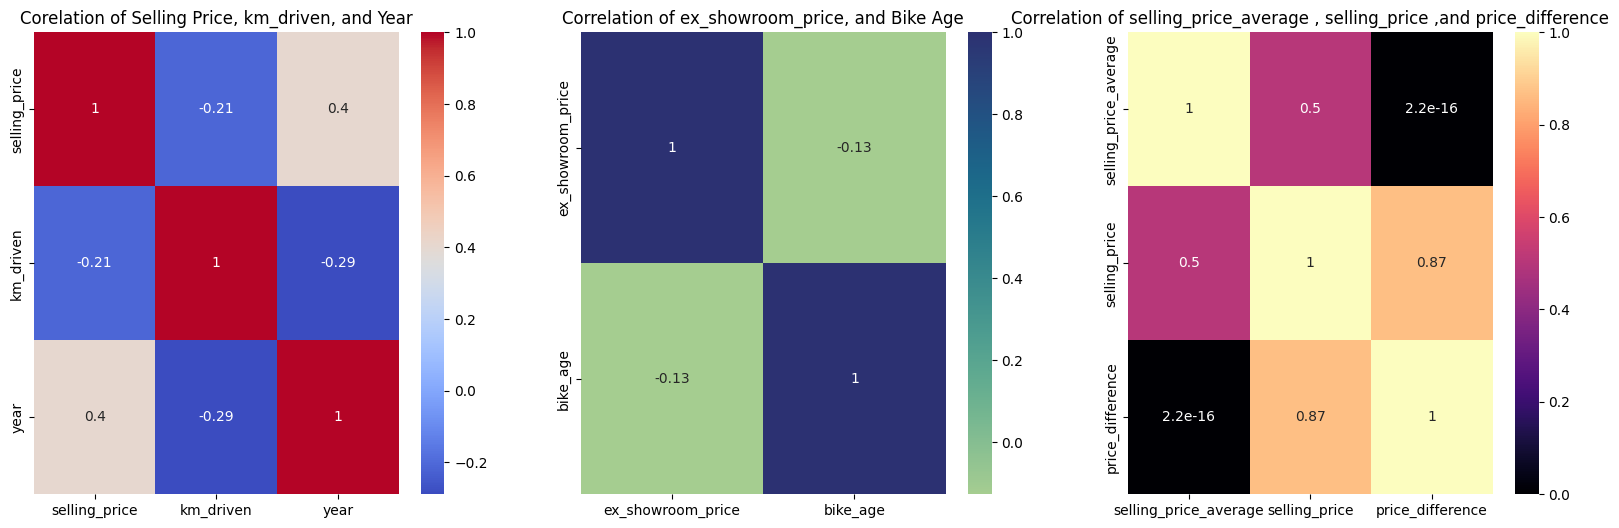

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
sns.heatmap(df[['selling_price', 'km_driven', 'year']].corr(), annot=True, cmap='coolwarm',ax=axes[0])
axes[0].set_title('Corelation of Selling Price, km_driven, and Year')
sns.heatmap(df[['ex_showroom_price','bike_age']].corr(), annot=True, cmap='crest',ax=axes[1])
axes[1].set_title('Correlation of ex_showroom_price, and Bike Age')
sns.heatmap(df[['selling_price_average','selling_price','price_difference']].corr(), annot=True, cmap='magma',ax=axes[2])
axes[2].set_title('Correlation of selling_price_average , selling_price ,and price_difference')

plt.show()